## 导入模块

In [1]:
import os
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

In [2]:
from Utils.Models import *
from Utils.My_Utils_Magnetic_methods import *

## 单个物体及标注可视化

### 球体

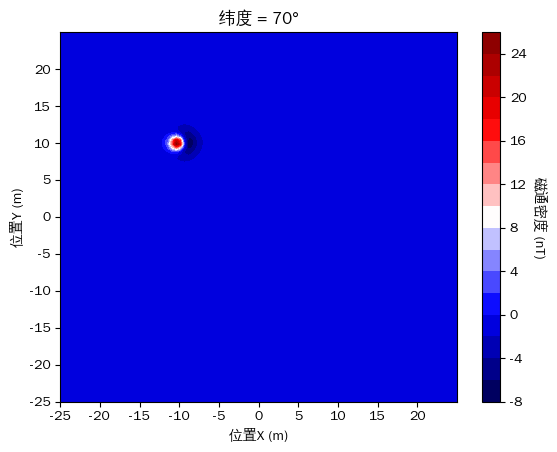

In [3]:
test_diple = Dipole(x=10,y=-10,r=0.15,h=1.5,Latitudes=70)
test_diple.Plot_X_array_raw()


In [4]:
test_diple.m

65.8

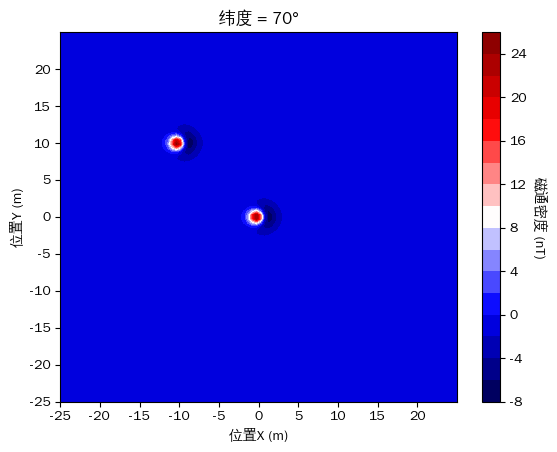

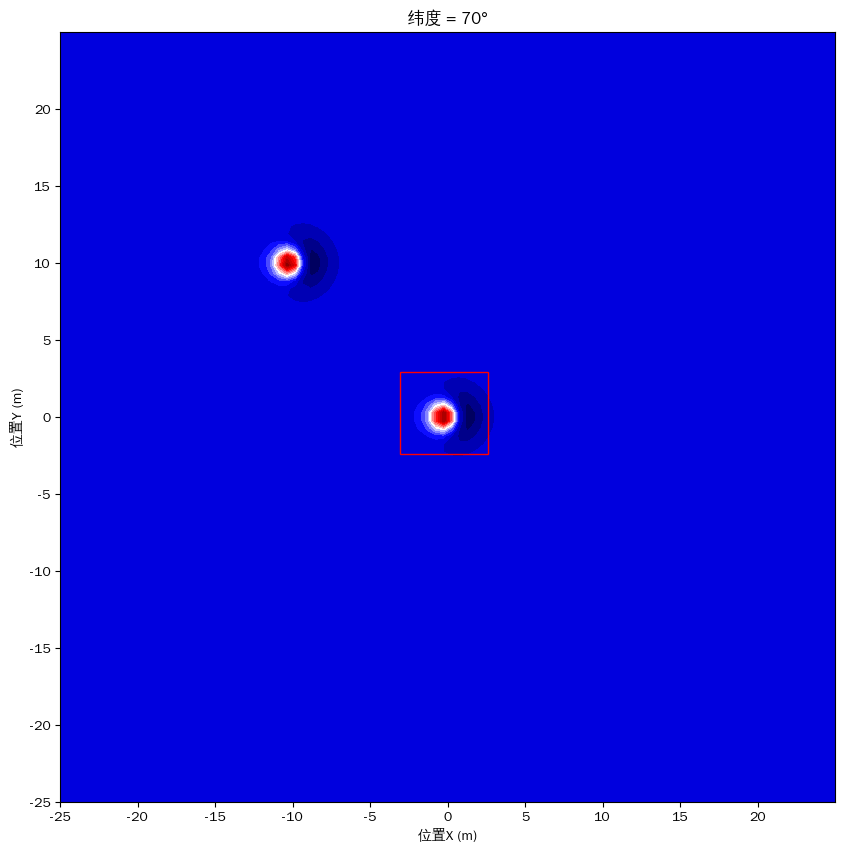

In [9]:
test2 = Dipole()

test2.F = np.add(test_diple.F,test2.F)

test2.Plot_X_array_raw()
test2.plt_with_box()

### 椭球

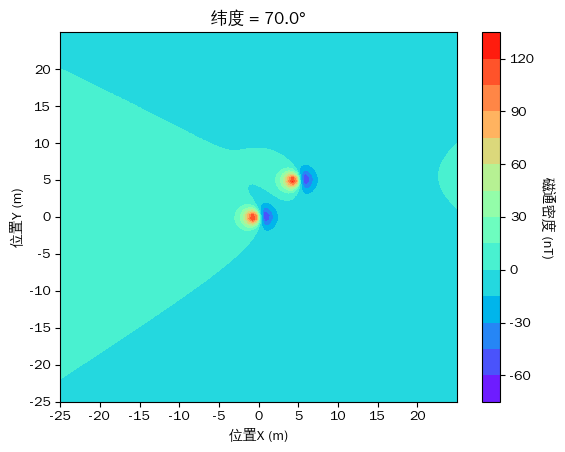

In [12]:
test_elli = Ellipse(x=5,y=5,a=0.4,gama=90,theta=0,phi=-5)
test_elli2 = Ellipse()
test_elli.F = test_elli.F +test_elli2.F
test_elli.Plot_X_array_raw()

In [7]:
print(f'球体异常极值{np.max(test_diple.F)},{np.min(test_diple.F)}')
print(f'椭球异常极值{np.max(test_elli.F)},{np.min(test_elli.F)}')

球体异常极值24.845665124976012,-6.882376110662717
椭球异常极值37.25418558686217,-5.384285410078069


### 圆柱体

## 最多9个物体同图及标注生成

In [ ]:
random_seed = 42
np.random

## 保存数据

In [8]:
from scipy.spatial import cKDTree

# the indices of the non-zero locations and their corresponding values
nonzero_idx = np.vstack(np.where(mask)).T
nonzero_vals = A[mask]

# build a k-D tree
tree = cKDTree(nonzero_idx)

# use it to find the indices of all non-zero values that are at most 1 pixel
# away from each edge pixel
edge_idx = np.vstack(np.where(edges)).T
neighbours = tree.query_ball_point(edge_idx, r=1, p=np.inf)

# take the average value for each set of neighbours
new_vals = np.hstack(np.mean(nonzero_vals[n]) for n in neighbours)

# use these to replace the values of the edge pixels
A_new = A.astype(np.double, copy=True)
A_new[edges] = new_vals

NameError: name 'mask' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个球体磁异常的二维数组
size = 100
x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)
X, Y = np.meshgrid(x, y)
radius = 0.5
sphere = np.sqrt(X**2 + Y**2) < radius

# 计算数组的梯度（有限差分法）
grad_x, grad_y = np.gradient(sphere)

# 计算梯度幅度
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# 使用梯度幅度确定边界
threshold = 0.5  # 设置梯度阈值
boundary = gradient_magnitude > threshold

# 找到边界框
boundary_indices = np.argwhere(boundary)
min_y, min_x = np.min(boundary_indices, axis=0)
max_y, max_x = np.max(boundary_indices, axis=0)

# 绘制原始数组
plt.figure(figsize=(8, 6))
plt.imshow(sphere, extent=(-1, 1, -1, 1), cmap='gray')

# 绘制边界框
plt.plot([x[min_x], x[max_x]], [y[min_y], y[min_y]], color='red')  # 上边界
plt.plot([x[min_x], x[max_x]], [y[max_y], y[max_y]], color='red')  # 下边界
plt.plot([x[min_x], x[min_x]], [y[min_y], y[max_y]], color='red')  # 左边界
plt.plot([x[max_x], x[max_x]], [y[min_y], y[max_y]], color='red')  # 右边界

plt.gca().set_aspect('equal', adjustable='box')  # 设置坐标轴相等
plt.title('球体磁异常及其边界框')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
print(np.max(outliers))

1
